In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [618]:
df = pd.read_csv("/content/Car_Purchasing_Data.csv",encoding = 'ISO-8859-1')

In [619]:
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [620]:
df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [621]:
df['Country'].nunique()

211

In [622]:
#sns.pairplot(df)

In [623]:
X  = df.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis = 1)

In [624]:
y  = df.iloc[:,-1]

In [625]:
y = y.values.reshape(-1,1)

In [626]:
y.shape

(500, 1)

In [627]:
X.shape

(500, 5)

In [628]:
from sklearn.preprocessing import MinMaxScaler
scx = MinMaxScaler(feature_range = (0,1))
X_scaled  = scx.fit_transform(X)

In [629]:
Y_scaled  = scx.fit_transform(y)

In [630]:
scx.data_max_

array([80000.])

In [631]:
scx.data_min_

array([9000.])

In [632]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])], remainder = 'passthrough')
X1 = ct.fit_transform(X)

In [633]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,Y_scaled,test_size = .25)

In [634]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [635]:
ann =Sequential()
ann.add(Dense(25,input_dim = 5,activation = 'relu'))
ann.add(Dense(25,activation = 'relu'))
ann.add(Dense(1,activation = 'linear'))
ann.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [636]:
ann.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 25)                150       
                                                                 
 dense_58 (Dense)            (None, 25)                650       
                                                                 
 dense_59 (Dense)            (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [637]:
epochs_hit = ann.fit(xtrain,ytrain,batch_size=50,epochs = 100,verbose = 1,validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 0.0376 - val_loss: 0.0212
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0175 - val_loss: 0.0127
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0128 - val_loss: 0.0147
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0130 - val_loss: 0.0137
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0082
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.0070
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 11/100
6/6 [====

In [638]:
epochs_hit.history.keys()

dict_keys(['loss', 'val_loss'])

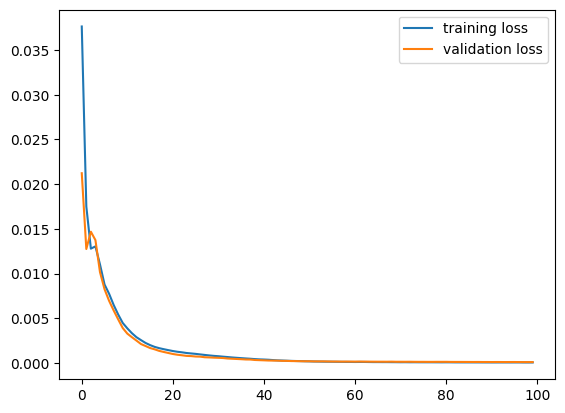

In [639]:
plt.plot(epochs_hit.history['loss'],label='training loss')
plt.plot(epochs_hit.history['val_loss'],label='validation loss')
plt.legend()

In [640]:
ann.predict(xtest)

4/4 [==============================] - 0s 3ms/step


array([[0.19212712],
       [0.38398466],
       [0.35032377],
       [0.5933639 ],
       [0.691405  ],
       [0.46843243],
       [0.49623564],
       [0.76067984],
       [0.86702245],
       [0.48459575],
       [0.6128404 ],
       [0.6320406 ],
       [0.44165337],
       [0.6918982 ],
       [0.37988254],
       [0.72349036],
       [0.4949645 ],
       [0.53259486],
       [0.1470926 ],
       [0.00922511],
       [0.3707393 ],
       [0.5372907 ],
       [0.5640113 ],
       [0.4165325 ],
       [0.56098175],
       [0.6757564 ],
       [0.4157882 ],
       [0.29200312],
       [0.55321175],
       [0.53813344],
       [0.5039766 ],
       [0.40409246],
       [0.43631625],
       [0.5229578 ],
       [0.47300807],
       [0.50629985],
       [0.57519084],
       [0.41144818],
       [0.34215602],
       [0.80354905],
       [0.4505074 ],
       [0.5650866 ],
       [0.59307927],
       [0.4756599 ],
       [0.51983994],
       [0.508476  ],
       [0.38719872],
       [0.267

In [641]:
ypred = scx.inverse_transform(ann.predict(xtest))

4/4 [==============================] - 0s 2ms/step


In [642]:
ypred

array([[22641.025],
       [36262.91 ],
       [33872.99 ],
       [51128.836],
       [58089.754],
       [42258.7  ],
       [44232.73 ],
       [63008.266],
       [70558.59 ],
       [43406.297],
       [52511.668],
       [53874.883],
       [40357.387],
       [58124.773],
       [35971.66 ],
       [60367.812],
       [44142.48 ],
       [46814.234],
       [19443.574],
       [ 9654.982],
       [35322.492],
       [47147.637],
       [49044.8  ],
       [38573.81 ],
       [48829.703],
       [56978.703],
       [38520.965],
       [29732.223],
       [48278.03 ],
       [47207.473],
       [44782.336],
       [37690.566],
       [39978.453],
       [46130.004],
       [42583.574],
       [44947.29 ],
       [49838.547],
       [38212.82 ],
       [33293.08 ],
       [66051.984],
       [40986.023],
       [49121.15 ],
       [51108.625],
       [42771.85 ],
       [45908.633],
       [45101.797],
       [36491.11 ],
       [27964.664],
       [53469.223],
       [24280.355],


In [643]:
ytest = scx.inverse_transform(ytest)

In [644]:
ytest

array([[22091.11839],
       [37076.82508],
       [34678.83226],
       [51405.55229],
       [58045.56257],
       [42484.02283],
       [44418.60955],
       [63738.39065],
       [70878.29664],
       [43405.89086],
       [52313.98392],
       [53655.53859],
       [40093.61981],
       [58235.41454],
       [36019.9556 ],
       [60960.83428],
       [43994.35972],
       [45977.12502],
       [12895.71468],
       [ 9000.     ],
       [35475.00344],
       [47143.44008],
       [49258.87571],
       [38174.87433],
       [49336.11628],
       [57441.44414],
       [38502.42392],
       [30719.8156 ],
       [48052.65091],
       [47380.91224],
       [46188.83514],
       [38504.39444],
       [39975.43302],
       [46135.27233],
       [42747.53925],
       [45115.52566],
       [49991.60697],
       [38930.55234],
       [33261.00057],
       [66648.25077],
       [41357.17897],
       [48300.02057],
       [50666.88173],
       [42793.9932 ],
       [46380.44732],
       [45

In [645]:
100-((((abs(ytest-ypred))/ytest)*100).mean())

98.36299161490315

In [700]:
rndm_prediction = np.array([[1, 50, 50000, 10985, 629312]])

In [701]:
y_rndm_prediction = ann.predict(rndm_prediction)

1/1 [==============================] - 0s 40ms/step


In [702]:
y_rndm_prediction

array([[215216.31]], dtype=float32)